In [1]:
from math import sqrt
#third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Mean square error

In [2]:
# regression line best fit line
a = 1.2
b = 2

In [3]:

points  =[(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]
m = len(points)

In [4]:
x_vec = np.array([x for (x,y) in points])
y_vec = np.array([y for (x,y) in points])
x_vec, y_vec

(array([ 2,  5, -4, -7,  8]), array([-2,  6, -4,  1, 14]))

In [5]:
y_hat = a * x_vec + b
y_hat

array([ 4.4,  8. , -2.8, -6.4, 11.6])

In [6]:
errors_abs = np.absolute(y_hat-y_vec)

In [7]:
mean_abs_error = 1/m*np.sum(errors_abs)
mean_abs_error

3.88

Mean square error

In [8]:
errors_sqaured = (y_hat-y_vec)**2
errors_sqaured

array([40.96,  4.  ,  1.44, 54.76,  5.76])

In [9]:
mean_sqauresd_error = 1/(2*m)*np.sum(errors_sqaured)
mean_sqauresd_error

10.692000000000002

In [10]:
# perform gradient descent
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

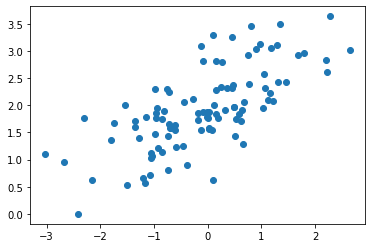

In [11]:
plt.scatter(X, y, zorder = 3)
plt.show()

In [12]:
n_points = X.shape[0]
W = np.zeros(X.shape[1]) # coefficients
b = 0 # intercept
n_points, W, b

(100, array([0.]), 0)

In [13]:
regression_coef = [np.hstack((W,b))]
regression_coef

[array([0., 0.])]

In [14]:
batch = np.random.choice(range(n_points), batch_size)
X_batch = X[batch,:]
y_batch = y[batch]
X_batch, y_batch

NameError: name 'batch_size' is not defined

In [ ]:
learn_rate=0.005

In [ ]:
X, y, W, b  = X_batch, y_batch, W, b 

In [ ]:
X, y, W, b

## Teodor: try to derive gradient from scratch

In [ ]:
np.matmul(X,W)+b

In [ ]:


for _ in range(num_iter):
    batch = np.random.choice(range(n_points), batch_size)
    X_batch = X[batch,:]
    y_batch = y[batch]
    W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
    regression_coef.append(np.hstack((W,b)))


In [ ]:
# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array obf slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

In [ ]:
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    W_new =  W - learn_rate*(y-W*X-b)*X
    b_new = b - learn_rate*(y-W*X-b)*X
    
    return W_new, b_new


In [ ]:

regression_coef = miniBatchGD(X, y)

# plot the results
import matplotlib.pyplot as plt

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

In [ ]:
y_hat = model.predict(X)

In [ ]:
plt.plot(X,y_hat)
plt.scatter(X, y, zorder = 3)


In [ ]:
data = pd.read_csv("bmi_and_life_expectancy.csv")
data.head()

In [ ]:
# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
X = bmi_life_data[["BMI"]]
y = bmi_life_data[["Life expectancy"]]




In [ ]:
# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(X,y)



In [ ]:
# Make a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])

In [ ]:
laos_life_exp

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()

In [ ]:
boston_data

In [ ]:
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and assign it to the model variable
model = LinearRegression()
model.fit(x,y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

In [ ]:
prediction

In [ ]:
# perform gradient descent
data = pd.read_csv('data_polynomial.csv', delimiter=',')
data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = data["Var_X"].values.reshape((-1,1))
y = data["Var_Y"]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
poly_feat = PolynomialFeatures(degree=3)
X_poly = poly_feat.fit_transform(X)
X_poly

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_poly,y)


In [ ]:
y_hat = poly_model.predict(X_poly)

In [ ]:
plt.scatter(X,y_hat)
plt.scatter(X,y)

## Lasso Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
# TODO: Add import statements
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv("data.csv", header=None)
X = train_data.iloc[:,:6]
y = train_data.iloc[:,6]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X,y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

In [16]:
df = pd.read_csv("lasso_regression.csv", header=None)
df.head()


,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122


In [30]:
X = df.iloc[:,:6]
y = df.iloc[:,6]
X.head()



TypeError: 'Lasso' object is not callable

In [36]:
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X,y)


Lasso()

## first and las column are not importnant

In [41]:
lasso_reg.coef_

array([ 0.        ,  2.35793224,  2.00441646, -0.05511954, -3.92808318,
        0.        ])

NameError: name 'X_train' is not defined

In [42]:

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

NameError: name 'X_train' is not defined

## Standarization and Normalization

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Assign the data to predictor and outcome variables
# TODO: Load the data
# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv("data.csv", header=None)
X = train_data.iloc[:,:6]
y = train_data.iloc[:,6]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()
lasso_reg.fit(X_scaled,y)


# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

In [48]:
df = pd.read_csv("lasso_regression.csv", header=None)
df.head(3)


,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459


In [47]:
X = df.iloc[:,:6]
y = df.iloc[:,6]
X.head()


,0,1,2,3,4,5
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022


In [49]:
scaler = StandardScaler()

In [53]:
X_scaled = scaler.fit_transform(X)

In [54]:
lasso_reg = Lasso()
lasso_reg.fit(X_scaled,y)

Lasso()

In [55]:
lasso_reg.coef_

array([  0.        ,   3.90753617,   9.02575748,  -0.        ,
       -11.78303187,   0.45340137])

## Their solution 

In [56]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[0.]
